# **K-Means**

Implementation of the K-MEANS algorithm for classification of database data:
 	
http://archive.ics.uci.edu/ml/   





# **Wine Data Set**
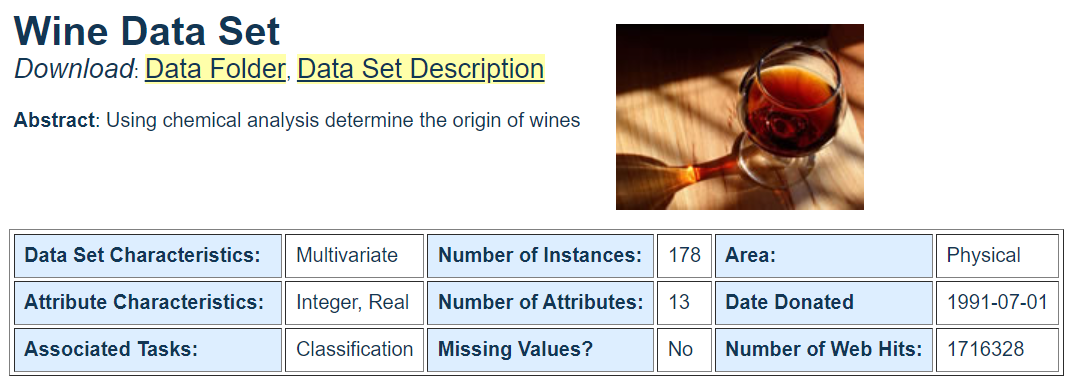

*These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.*

**Attribute Information:**

0. Id number
1. Alcohol
2. Malic acid
3. Ash
4. Alcalinity of ash
5. Magnesium
6. Total phenols
7. Flavanoids
8. Nonflavanoid phenols
9. Proanthocyanins
10. Color intensity
11. Hue
12. OD280/OD315 of diluted wines
13. Proline

from: https://archive.ics.uci.edu/ml/datasets/Wine




# **Import Libraries**

In [83]:
import pandas as pd
import numpy as np
np.set_printoptions(precision=4)
import seaborn as sns

# **Import Dataset**

In [84]:
import pandas as pd
import numpy as np
X= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/wine.data')
X.rename(columns={"1": 0, "14.23": 1, "1.71": 2, "2.43": 3, "15.6": 4, "127": 5,
                 "2.8": 6,"3.06": 7, ".28": 8, "2.29": 9, "5.64": 10, "1.04": 11, "3.92": 12, "1065": 13}, inplace=True)
X.describe().round(1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,177.0,177.0,177.0,177.0,177.0,177.0,177.0,177.0,177.0,177.0,177.0,177.0,177.0,177.0
mean,1.9,13.0,2.3,2.4,19.5,99.6,2.3,2.0,0.4,1.6,5.1,1.0,2.6,745.1
std,0.8,0.8,1.1,0.3,3.3,14.2,0.6,1.0,0.1,0.6,2.3,0.2,0.7,314.9
min,1.0,11.0,0.7,1.4,10.6,70.0,1.0,0.3,0.1,0.4,1.3,0.5,1.3,278.0
25%,1.0,12.4,1.6,2.2,17.2,88.0,1.7,1.2,0.3,1.2,3.2,0.8,1.9,500.0
50%,2.0,13.0,1.9,2.4,19.5,98.0,2.4,2.1,0.3,1.6,4.7,1.0,2.8,672.0
75%,3.0,13.7,3.1,2.6,21.5,107.0,2.8,2.9,0.4,2.0,6.2,1.1,3.2,985.0
max,3.0,14.8,5.8,3.2,30.0,162.0,3.9,5.1,0.7,3.6,13.0,1.7,4.0,1680.0


# **Escolha dos centroídes:** 

Com base na descrição a cima foi escolhido 3 centroídes, sendo: 

* Centroíde 1: média dos dados (mean);
* Centroíde 2: valores mínimos (min);
* Centroíde 3: valores máximos (max).

In [85]:
centroide = [[1.9,	13.0,	2.3,	2.4,	19.5,	99.6,	2.3,	2.0,	0.4,	1.6,	5.1,	1.0,	2.6,	745.1],
          [1.0,	11.0,	0.7,	1.4,	10.6,	70.0,	1.0,	0.3,	0.1, 0.4,	1.3,	0.5,	1.3,	278.0],
          [3.0,	14.8,	5.8,	3.2,	30.0,	162.0,	3.9,	5.1,	0.7,	3.6,	13.0,	1.7,	4.0,	1680.0]]

# **Distância Euclidiana**

1º passo: Cálculo da distância entre dois pontos

In [86]:
def distancia_euclidiana(X, centroide, numero_centroide):   
    d=[]
    soma=0
    for i in range(len(X)):
        soma=0
        for j in range(len(X.loc[0,:])):
            soma = soma + (X.loc[i,j]-centroide[numero_centroide][j])**2
        d.append(np.sqrt(soma))
    return d

# **Classificação do Centroíde**

2º passo: Distribuição dos pontos nos respectivos centroídes.

O ponto vai pertencer ao centroíde na qual tiver a menor distância.

*d_c1: distância do centroíde 1*

*d_c2: distância do centroíde 2*

*d_c3: distância do centroíde 3*

In [87]:
def class_centroide(d_c1,d_c2,d_c3,d_c4=0):
    v=[]
    if d_c4==0:
        for i in range(len(d_c2)):
            if ((d_c1[i]<d_c2[i])&(d_c1[i]<d_c3[i])):
                v.append('c1')
            if ((d_c2[i]<d_c1[i])&(d_c2[i]<d_c3[i])):
                v.append('c2')
            if ((d_c3[i]<d_c2[i])&(d_c3[i]<d_c1[i])):
                v.append('c3')
    if d_c4!=0:
        for i in range(len(d_c2)):
            if ((d_c1[i]<d_c2[i])&(d_c1[i]<d_c3[i])&(d_c1[i]<d_c4[i])):
                v.append('c1')
            if ((d_c2[i]<d_c1[i])&(d_c2[i]<d_c3[i])&(d_c2[i]<d_c4[i])):
                v.append('c2')
            if ((d_c3[i]<d_c2[i])&(d_c3[i]<d_c1[i])&(d_c3[i]<d_c4[i])):
                v.append('c3')
            if ((d_c4[i]<d_c1[i])&(d_c4[i]<d_c2[i])&(d_c4[i]<d_c3[i])):
                v.append('c4')            
    return v

 # **Novo Centroíde**

 **3º passo:** O centroíde é movido para a posição média dos seus respectivos pontos. 

In [88]:
def novo_centroide(indices_c):   
    soma=0
    c_novo=[]
    for j in range(X.shape[1]):
        soma=0
        for i in indices_c:
            soma=soma+X.iloc[i,j]
        x_centro=soma/len(indices_c)
        x_centro=round(x_centro,2)
        c_novo.append(x_centro)
    return c_novo

# Iterações

Processo é repetido até que a convergência dos pontos centrais tenha sido alcançada

In [89]:
# 1º passo: Cálculo da distância entre ponto e os centroídes
d_c1 = distancia_euclidiana(X, centroide, 0)
d_c2 = distancia_euclidiana(X, centroide, 1)
d_c3 = distancia_euclidiana(X,centroide, 2)

# 2º passo: Distribuição dos pontos nos respectivos centroídes
cluster = class_centroide(d_c1,d_c2,d_c3)
cluster

# 3º passo: O centroíde é movido para a posição média dos seus respectivos pontos. 
indices_c1 = [i for i, j in enumerate(cluster) if j == 'c1']
indices_c2 = [i for i, j in enumerate(cluster) if j == 'c2']
indices_c3 = [i for i, j in enumerate(cluster) if j == 'c3']

centro1=novo_centroide(indices_c1)
centro2=novo_centroide(indices_c2)
centro3=novo_centroide(indices_c3)

centroide2=[centro1,centro2,centro3]

#Processo é repetido até que a convergência dos pontos centrais tenha sido alcançada

iteration= 1
for i in range(250): 
    
    # 1º passo:
    d_c1 = distancia_euclidiana(X, centroide2, 0)   
    d_c2 = distancia_euclidiana(X, centroide2, 1)
    d_c3 = distancia_euclidiana(X, centroide2, 2)

    # 2º passo:
    cluster = class_centroide(d_c1,d_c2,d_c3)

    # 3º passo::
    indices_c1 = [i for i, j in enumerate(cluster) if j == 'c1']
    indices_c2 = [i for i, j in enumerate(cluster) if j == 'c2']
    indices_c3 = [i for i, j in enumerate(cluster) if j == 'c3']

    centroide=centroide2

    centro1=novo_centroide(indices_c1)
    centro2=novo_centroide(indices_c2)
    centro3=novo_centroide(indices_c3)

    centroide2 =[centro1,centro2,centro3]
    iteration=iteration+1
    
print('Centroides:')
for i in centroide2:
    print(i, '\n')
print('Números de Iterações:',iteration,'\n')

Centroides:
[2.26, 12.93, 2.5, 2.41, 19.89, 103.6, 2.11, 1.58, 0.39, 1.5, 5.65, 0.88, 2.37, 728.34] 

[2.28, 12.52, 2.49, 2.29, 20.82, 92.35, 2.07, 1.76, 0.39, 1.45, 4.09, 0.94, 2.49, 458.23] 

[1.02, 13.8, 1.89, 2.43, 17.05, 105.04, 2.87, 3.01, 0.29, 1.9, 5.7, 1.08, 3.1, 1197.98] 

Números de Iterações: 251 



 # **Gráfico**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


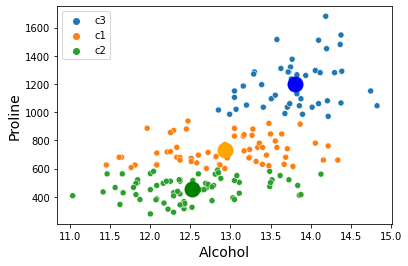

In [92]:
#"Alcohol": coluna 1 x "Proline": coluna 13
plt.xlabel("Alcohol", fontsize=14)
plt.ylabel("Proline", fontsize=14)
sns.scatterplot(X.loc[:,1],X.loc[:,13],hue=cluster)

#Plot centers
plt.scatter(centroide2[0][1],centroide2[0][13],  marker="o", color= 'orange', s=120, linewidths=5)
plt.scatter(centroide2[1][1],centroide2[1][13], marker="o", color= 'green', s=120, linewidths=5)
plt.scatter(centroide2[2][1],centroide2[2][13], marker="o", color= 'blue', s=120, linewidths=5);